In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
N_DETECTOR = 8
N_BINS = 1024
CH_SIZE = 4 # 4 - bytes per channel

In [3]:
filename = '../../DT5550_DAQ/daq/ReadoutClient/waveform.output'

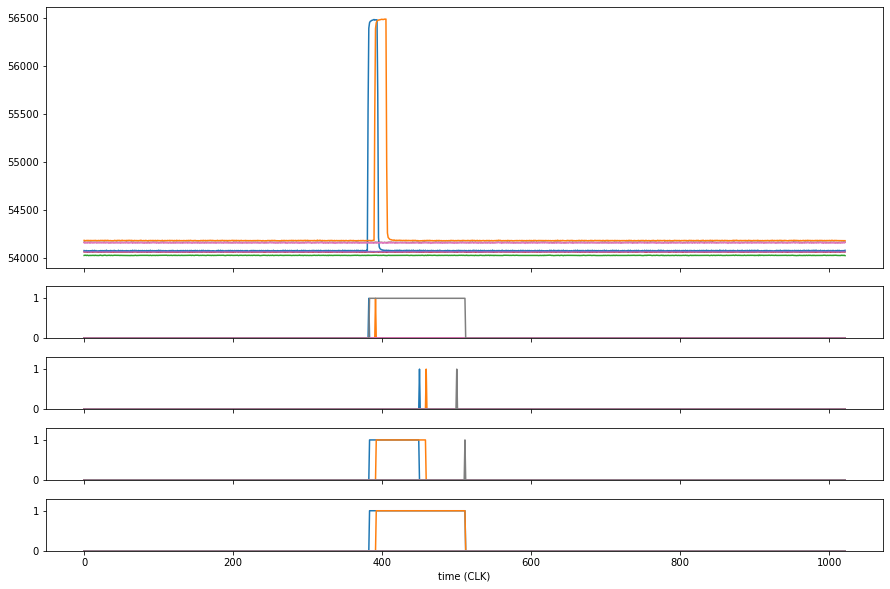

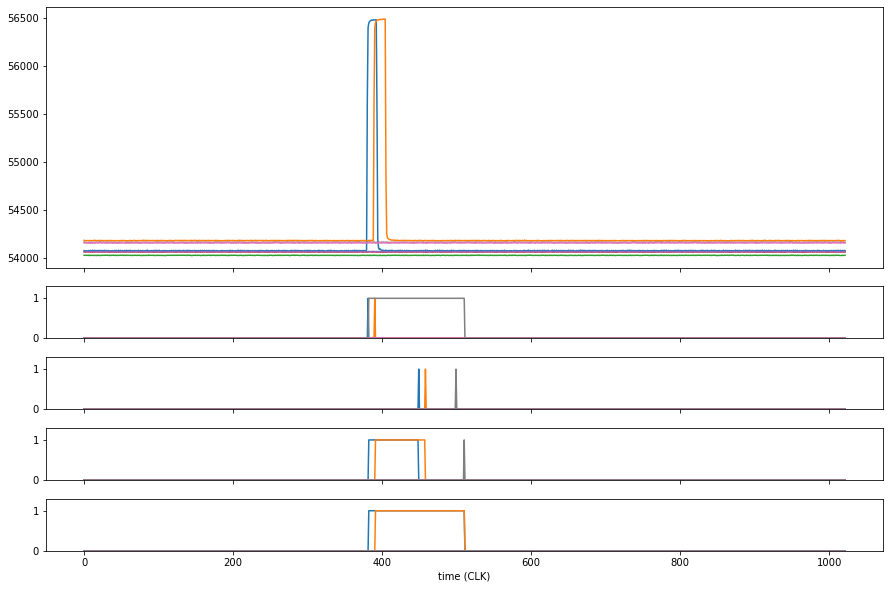

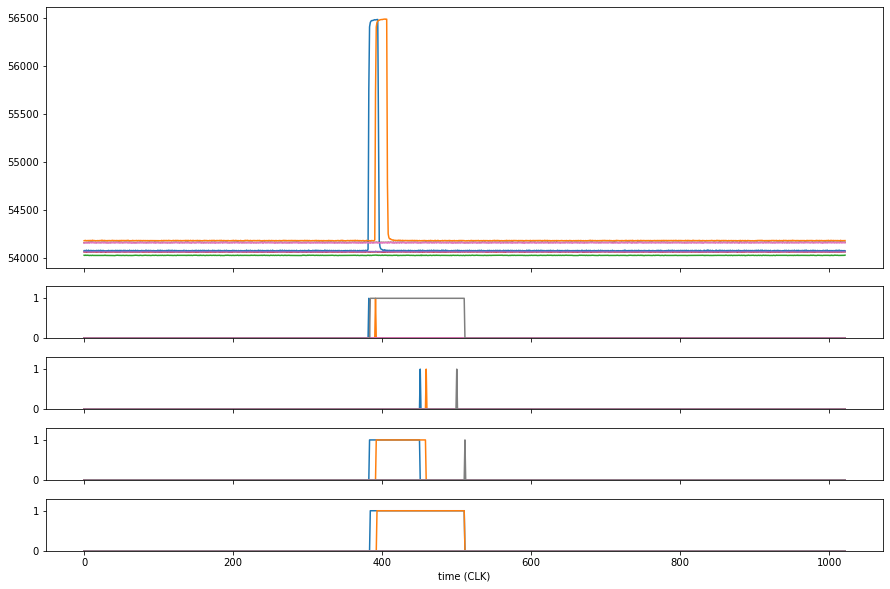

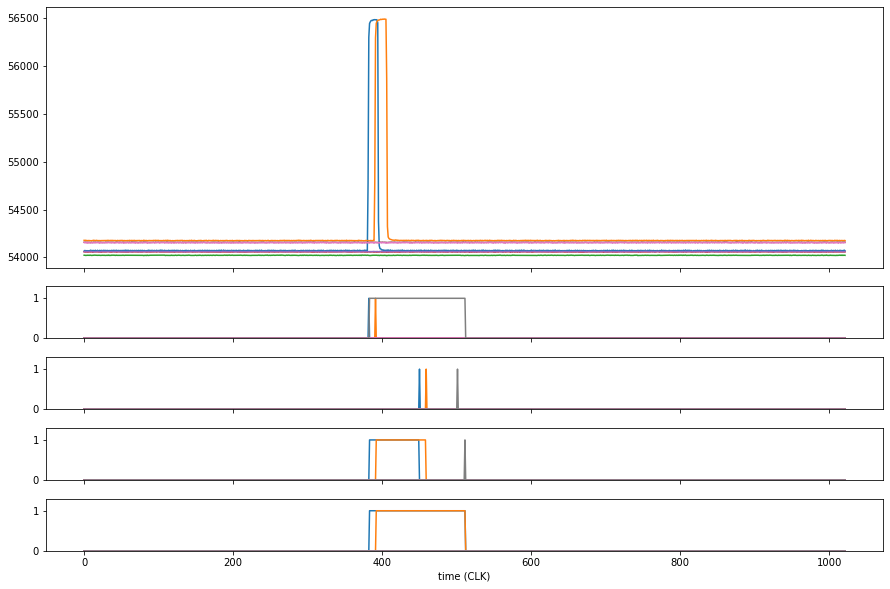

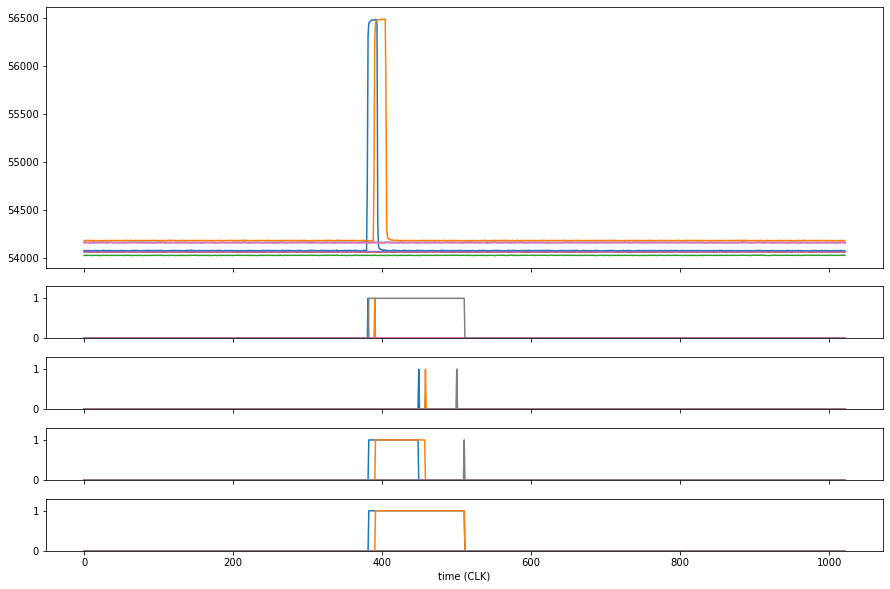

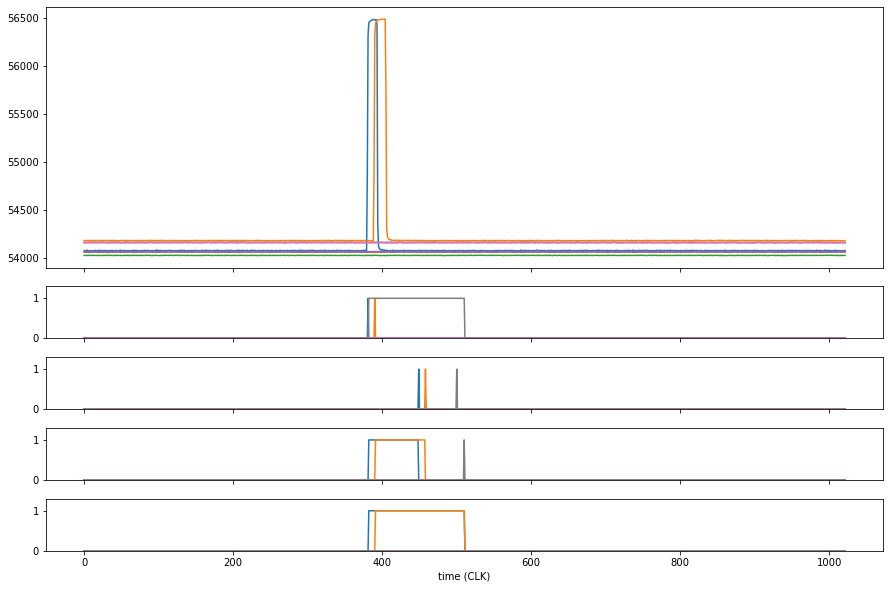

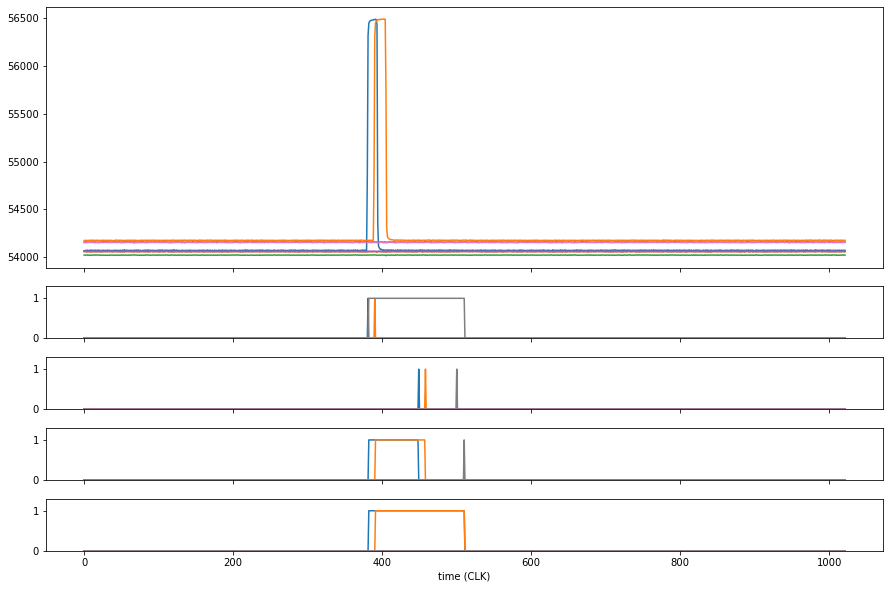

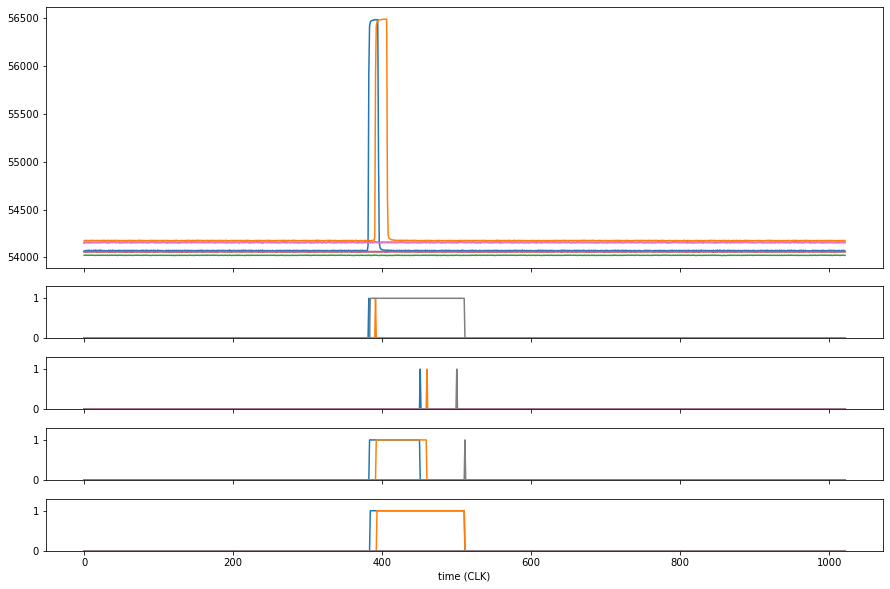

In [ ]:
f = open(filename,"rb")
tt = np.zeros(N_BINS)
analog = np.zeros([N_DETECTOR,N_BINS])
d0 = np.zeros([N_DETECTOR,N_BINS])
d1 = np.zeros([N_DETECTOR,N_BINS])
d2 = np.zeros([N_DETECTOR,N_BINS])
d3 = np.zeros([N_DETECTOR,N_BINS])

for nevent in range(20):
    # process single event
    wave = f.read(N_BINS*N_DETECTOR*CH_SIZE)
    for idet in range(N_DETECTOR):
        for i in range(N_BINS):
            i0 = i*CH_SIZE + idet*N_BINS*CH_SIZE
            i1 = i0+CH_SIZE
            tt[i] = i*12.5
            analog[idet][i] = int.from_bytes(wave[i0:i1],byteorder='little') & 0x0000ffff
            d0[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00010000) >> 16
            d1[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00020000) >> 17
            d2[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00040000) >> 18
            d3[idet][i] = (int.from_bytes(wave[i0:i1],byteorder='little') & 0x00080000) >> 19

    # plot single event
    imin=0
    imax=1022
    fig, axs = plt.subplots(5,1, sharex=True, gridspec_kw={'height_ratios':[5,1,1,1,1]}, figsize=(15,10))
    for idet in range(N_DETECTOR-1):
        axs[0].plot(analog[idet][imin:imax])
        axs[1].plot(d0[idet][imin:imax])
        axs[2].plot(d1[idet][imin:imax])
        axs[3].plot(d2[idet][imin:imax])
        axs[4].plot(d3[idet][imin:imax])

    if N_DETECTOR == 8:
        axs[1].plot(d0[7][imin:imax])
        axs[2].plot(d1[7][imin:imax])
        axs[3].plot(d2[7][imin:imax])
        axs[4].plot(d3[7][imin:imax])    
    
    for i in range(1,5):
        axs[i].set_ylim([0,1.3])

    plt.xlabel('time (CLK)')
    plt.show()
    
    time.sleep(1)
f.close()